<a href="https://colab.research.google.com/github/anthony-anania/Zombie/blob/main/Zombies_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Names: Anthony Anania, Iris Guan

# **Intoduction**
We are facing a zombie epidemic and we wish to model such a situation. We will be using the model published by a University of Ottawa reseacher and his students as a foundation to our model. However, in our model, we will be adding elements that will give a chance for humanity to survive the epidemic.

# **Rewriting a New Model: The New Groups**

In order to give humanity a chance to survive the epidemic, humanity will take two measures against the zombies: vaccination and quarantine.

When the first case of a zombie appears, humans will try to find a vaccine to protect themselves from zombies. This will add a new group in our model of the zombie epidemic: the vaccinated people (V). Therefore, people in the suscepible group can get vaccinated and move to the vaccinated group at a certain rate (PI). Vaccinated people can no longer be infected by a zombie.

Since a zombie can resurrect, humans will put dead zombies in quarantine (lock them up in different places). If a dead zombie resurrects, it will be in quarantine and it will take some time for that zombie to get out of its "prison" to join all the other zombies that are still alive. This leads to the creation of a second new group in our model: the quarantined zombies (Q). Zombies in quarantine cannot infect the susceptible group. Only zombies who leave their quarantine area or zombies that are not yet quarantined can infect people. Zombies can leave their quarantine area at a certain rate (MU).

Even if zombies can resurrect, they are not entirely invicible. When a zombie dies, there is a chance that the zombie will not resurrect and will stay dead. To account for those truly dead zombies, we will add yet another group in our new model: the destroyed zombies (D). The destroyed zombies are the few zombies that died in such a way that it is impossible for them to come back to life. The probability that a zombie cannot be resurrected is (GAMMA). Destroyed zombies cannot infect the susceptible group.

With the addition of our new parameters to rectify the original model, we get the following new model:

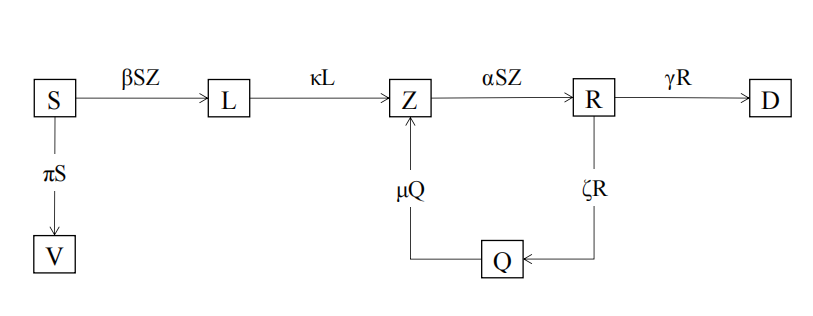

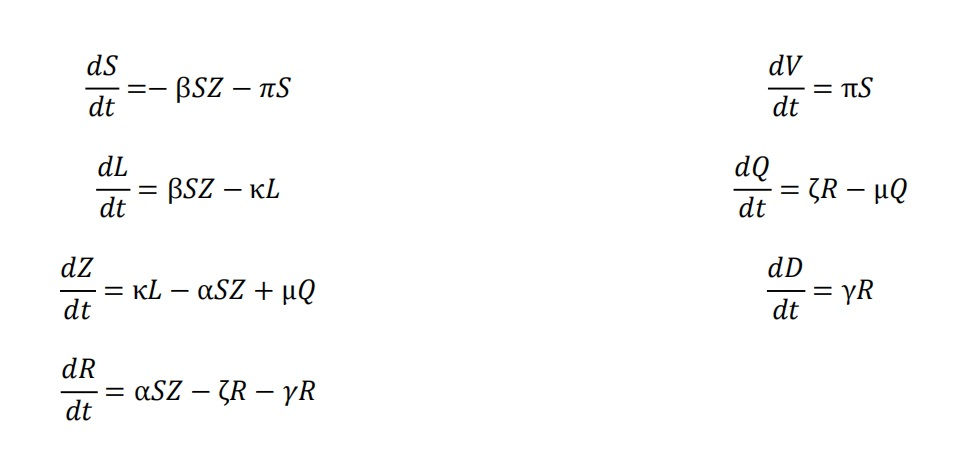


# **Quantifying the New Parameters (constants)**

For those zombies who were lucky enough to resurrect, we have declared a new constant: MU, which takes into account the rate of the quarantined people returning to the zombie population per day. We decided on setting the 'jail'/quarantine time to 14 days.
Albeit it is possible for zombies to resurrect, it is quite probable that most zombies will be eradicated without having the chance to come back to life. As mentioned above, they are not invincible beings, which is why we accounted for a new constant: GAMMA. This constant will reckon the chance of being completely destroyed without coming back to life. We also assumed that roughly one in five people would be wiped out.
Furthermore, our best option to allow humanity to survive was to factor in vaccinated people. Those vaccinated were considered to be immune to zombies. The last constant: (PI) that we have added to our updated model will calculate the rate at which the susceptible population gets vaccinated per one thousand people everyday and we have set this constant to 0.05 (50 people get vaccinated every day).

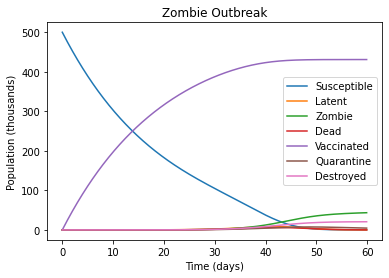

In [ ]:
"""
 Lab 1 - Modelling a zombie epidemic

 Author (python): A. Stewart
 Authors (java): S. Bhatnagar, J.F. Briere, J. Sumner
 Version: January 2020
 Description: Euler solution of zombie SIR model
"""

#Import packages
import numpy as np
import matplotlib.pyplot as plt

#Declare constants
DT = 0.1 #Time step (in days)
TFINAL = 60.0 #Total time of simulation (in days)
ALPHA = 0.005 #Zombie death rate (per 1000 persons per day)
BETA = 0.0095 #Zombie infection rate (per 1000 zombies per day)
KAPPA = 0.5 #Latent conversion rate (per day)
ZETA = 0.15 #Zombie resurrection rate (per day)
GAMMA = 0.2 #chance to be completely dead without coming back to life
MU = 1/14. #rate of quarantine people returning to zombie population (per day)
PI = 0.05 #rate of vaccination (per 1000 people per day)

#Total number of time steps
N = int((TFINAL/DT))

#Declare arrays
t = np.empty(N)	#Time (in days)
S = np.empty(N) #Susceptibles (in thousands)
L = np.empty(N) #Latents (in thousands)
Z = np.empty(N) #Zombies (in thousands)
R = np.empty(N) #Removed (in thousands)
V = np.empty(N) #Vaccinated (in thousands)
Q = np.empty(N) #Quarantine (in thousands)
D = np.empty(N) #Destroyed (in thousands)

#Iniitial conditions
t[0] = 0
S[0] = 500
L[0] = 0.001
Z[0] = 0
R[0] = 0
V[0] = 0
Q[0] = 0
D[0] = 0

#Euler loop
i = 1
while i < N:
  #Evolve the differential equations
  S[i] = S[i-1] - BETA * S[i-1] * Z[i-1] * DT - PI * S[i-1] * DT
  L[i] = L[i-1] + BETA * S[i-1] * Z[i-1] * DT - KAPPA * L[i-1] * DT
  Z[i] = Z[i-1] + KAPPA * L[i-1] * DT - ALPHA * S[i-1] * Z[i-1] * DT + MU * Q[i-1] * DT
  R[i] = R[i-1] + ALPHA * S[i-1] * Z[i-1] * DT - ZETA * R[i-1] * DT - GAMMA * R[i-1] * DT
  V[i] = V[i-1] + PI * S[i-1] * DT
  Q[i] = Q[i-1] + ZETA * R[i-1] * DT - MU * Q[i-1] * DT
  D[i] = D[i-1] + GAMMA * R[i-1] * DT


  #Increase the time and the loop counter by one step
  t[i] = t[i-1] + DT
  i += 1

#Plot the arrays
plt.plot(t,S,label='Susceptible')
plt.plot(t,L,label='Latent')
plt.plot(t,Z,label='Zombie')
plt.plot(t,R,label='Dead')
plt.plot(t,V,label='Vaccinated')
plt.plot(t,Q,label='Quarantine')
plt.plot(t,D,label='Destroyed')

plt.title('Zombie Outbreak')
plt.xlabel('Time (days)')
plt.ylabel('Population (thousands)')
plt.legend()

plt.show()

# **Conclusion**

From the output of our new model, we can see that humanity will survive the epidemic and will, in fact, out number the zombie population at the end of the outbreak. Even though the quarantine measure and the chance of zombies truly dying helps to slow down the process, the biggest factor that allows human to survive is the vaccine. Because the rate of vaccination is high enough for this particular outbreak, there is already more vaccinated people than susceptible people after just about 12 to 13 days. Meanwhile, at that same time, the zombie population is almost negligible (almost not visible in the graph). This means that most of the population is already protected while the infectious population is still very low.